# Download der Daten

Daten kannst du erst analysieren, wenn du sie zur Verfügung hast. Das klingt wie eine Binsenweisheit, aber oft ist es tatsächlich schwierig, sich Daten zu verschaffen.

## Download der Daten

Reddit ist eine außerordentlich gut geeignete Plattform für unstrukturierte Daten, weil es über ein API *erlaubt*, Daten herunterzuladen. 

Dazu musst du allerdings die URLs der Beiträge kennen. Leider kann man seit geraumer Zeit bei Reddit nicht mehr beliebig weit "rückwärts" blättern, so dass hier ein anderer Ansatz notwendig ist.

Glücklicherweise gibt es den Dienst [pushshift.io](https://pushshift.io), der die Auflistung historischer URLs ermöglicht. Ein Aufruf von https://api.pushshift.io/reddit/submission/search/?before=1624312800&sort=desc&subreddit=technology&size=100&fields=title,created_utc,url,full_link ergibt z.B.:

```javascript
{
    "data": [
        {
            "created_utc": 1624312535,
            "full_link": "https://www.reddit.com/r/technology/comments/o56nuu/back_to_the_future_imagine_your_car_paying_your/",
            "title": "Back to the future: Imagine your car paying your parking fine for you",
            "url": "https://www.axlenews.com/post/back-to-the-future-imagine-your-car-paying-your-parking-fine-for-you"
        },
        {
            "created_utc": 1624311972,
            "full_link": "https://www.reddit.com/r/technology/comments/o56glj/amazon_prime_day_is_a_nightmare_for_amazon_workers/",
            "title": "Amazon Prime Day Is a Nightmare for Amazon Workers",
            "url": "https://jacobinmag.com/2021/06/amazon-prime-day-workplace-safety-warehouse-osha-injuries-comp-amcare"
        },
        {
            "created_utc": 1624311504,
            "full_link": "https://www.reddit.com/r/technology/comments/o56a9v/how_i_found_a_vulnerability_to_hack_icloud/",
            "title": "How I Found A Vulnerability To Hack iCloud Accounts and How Apple Reacted To It",
            "url": "https://thezerohack.com/apple-vulnerability-bug-bounty"
        }
    ]
}
```

Ersetzst du in `full_link` alles hinter der `id` durch `.json` (etwa https://www.reddit.com/r/technology/comments/o56a9v.json), kannst du auf die strukturierten Daten von Reddit zugreifen 

```javascript
[
  {
    "kind": "Listing",
    "data": {
      "after": null,
      "dist": 1,
      "modhash": "",
      "geo_filter": "",
      "children": [
        {
          "kind": "t3",
          "data": {
            "approved_at_utc": null,
            "subreddit": "technology",
            "selftext": "",
            "user_reports": [],
            "saved": false,
            "mod_reason_title": null,
            "gilded": 0,
            "clicked": false,
            "title": "How I Found A Vulnerability To Hack iCloud Accounts and How Apple Reacted To It",
            "link_flair_richtext": [],
            "subreddit_name_prefixed": "r/technology",
            "hidden": false,
            "pwls": 6,
            "link_flair_css_class": "general",
            "downs": 0,
            "thumbnail_height": 70,
            "top_awarded_type": null,
            "parent_whitelist_status": "all_ads",
            "hide_score": false,
            "name": "t3_o56a9v",
            "quarantine": false,
            "link_flair_text_color": "dark",
            "upvote_ratio": 0.89,
            "author_flair_background_color": null,
            "subreddit_type": "public",
            "ups": 237,
            "total_awards_received": 4,
            "media_embed": {},
            "thumbnail_width": 140,
            "author_flair_template_id": null,
            "is_original_content": false,
            "author_fullname": "t2_bw2lxmyp",
            "secure_media": null,
            "is_reddit_media_domain": false,
            "is_meta": false,
[...]
```

Die Übernahme der Daten in eine Datenbank ist jetzt nur noch Fleißarbeit.

Beispiel-Code findet sich unter anderem in https://github.com/datanizing/ix-reddit, noch mehr technische Details im iX-Artikel [Beziehungssache](https://www.heise.de/select/ix/2021/7/2102513144636338770)

## Einschränkung der Datenmenge des Technology-Subreddits durch *Flairs*

Zuerst müssen wir einen kleinen "Ausflug" machen, um die Datenmenge auf die für uns interessanten Posts einzuschränken. Das Technology-Subreddit ist nämlich *riesig*. Viele Teile davon sind für die Business-Fragestellung des Fahrzeugherstellers völlig irrelevant. Dies ist ein Muster, dem man häufig in Data Science-Projekten begegnet. Entweder man hat zu wenig Daten oder zu viele.

Reddit kommt uns hierbei sehr entgegen, weil es sog. *Flairs* unterstützt. Dabei kann einem Post ein Thema zugeordnet werden.

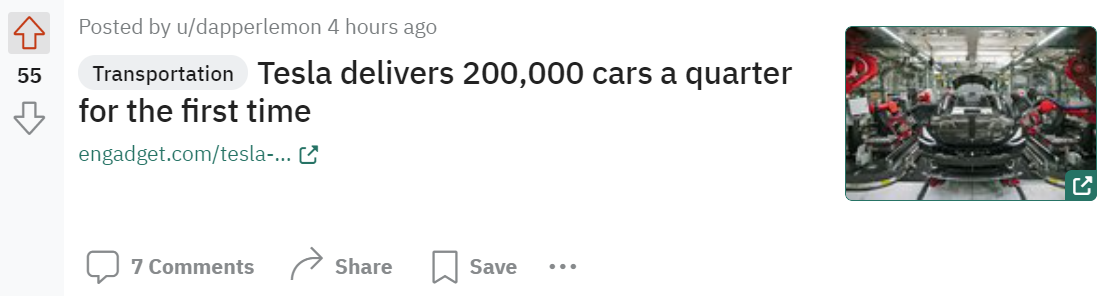

Das hier sichtbare Flair *Transportation* ist genau das, was du suchst. Leider ist die Welt allerdings nicht ganz so einfach, es gibt mehrere Schwierigkeiten:

1. Das Flair *Transportation* hieß früher nur *Transport*.
2. Die Flairs wurden von Reddit erst im Mai 2015 eingeführt.
3. Die Flairs werden nicht von allen Autoren konsistent verwendet.

All diese Probleme sind sehr typisch für Data Science-Projekte, weil häufig zunächst eine Bereinigung der Daten durchgeführt werden muss. Die Strategien unterscheiden sich dabei:
* Punkt 1 kannst du sehr einfach lösen, indem wir einfach beide Flairs berücksichtigen.
* Punkt 2 und 3 sind deutlich schwieriger. Dazu trainierst du einen Klassifikator und klassifizierst mit diesem einfach alle (Toplevel-) Posts neu. Die so gefundenen Posts verwendest du dann als Datenmenge für die weitere Analyse.